<a href="https://colab.research.google.com/github/gtanmay123/Task2/blob/main/Fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [86]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
df=pd.read_csv("/content/Fraud (1).csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
df.isnull()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
6362615,False,False,False,False,False,False,False,False,False,False,False
6362616,False,False,False,False,False,False,False,False,False,False,False
6362617,False,False,False,False,False,False,False,False,False,False,False
6362618,False,False,False,False,False,False,False,False,False,False,False


In [6]:
print(df.isnull().sum())

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


Outliers for box-plot


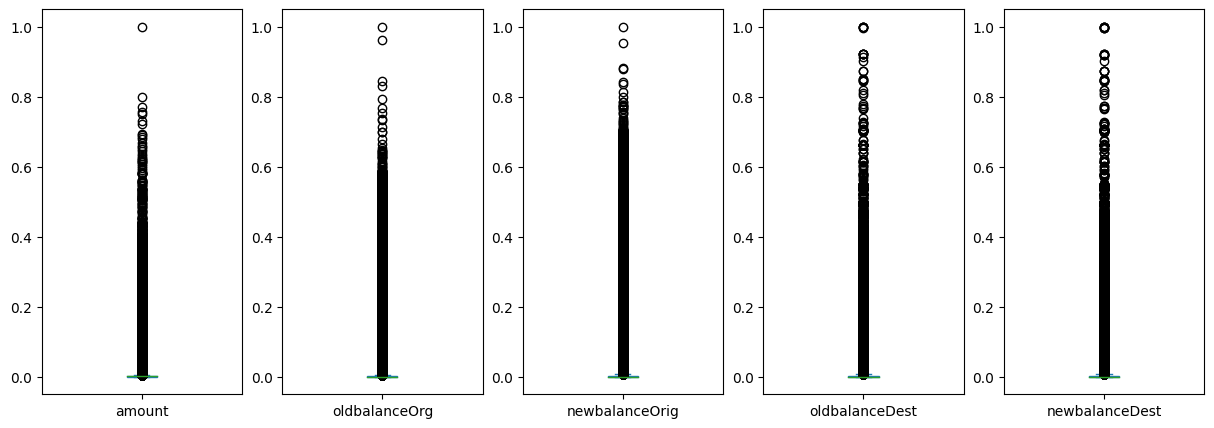

In [87]:
numeric_features = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
df[numeric_features].plot(kind='box', subplots=True, layout=(1, 5), figsize=(15, 5), patch_artist=True)
plt.show()

In [88]:
from scipy.stats import zscore

In [90]:
z_scores = np.abs(zscore(df[numeric_features]))
data = df[(z_scores < 3).all(axis=1)]

In [91]:
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,errorBalanceOrig,errorBalanceDest
0,1,3,0.000106,757869,0.002855,0.003233,1662094,0.000000,0.000000,0,0,0.838433,0.890013
1,1,3,0.000020,2188998,0.000357,0.000391,1733924,0.000000,0.000000,0,0,0.839102,0.890013
2,1,4,0.000002,1002156,0.000003,0.000000,439685,0.000000,0.000000,1,0,0.839244,0.890013
3,1,1,0.000002,5828262,0.000003,0.000000,391696,0.000059,0.000000,1,0,0.839244,0.890191
4,1,3,0.000126,3445981,0.000697,0.000603,828919,0.000000,0.000000,0,0,0.838280,0.890013
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362613,743,1,0.013617,1432154,0.021126,0.000000,71274,0.001414,0.004948,1,0,0.733611,0.879412
6362614,743,4,0.003674,3332123,0.005701,0.000000,251708,0.000000,0.000000,1,0,0.810751,0.890013
6362615,743,1,0.003674,5651847,0.005701,0.000000,505863,0.000000,0.000954,1,0,0.810751,0.887152
6362618,743,4,0.009195,2252932,0.014265,0.000000,319713,0.000000,0.000000,1,0,0.767922,0.890013


In [7]:
##Explotary Data Analysis


<Axes: xlabel='isFraud', ylabel='count'>

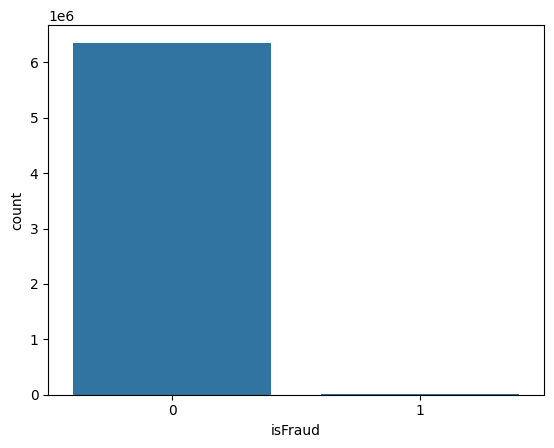

In [8]:
sns.countplot(x='isFraud',data=df)

<Axes: xlabel='isFlaggedFraud', ylabel='count'>

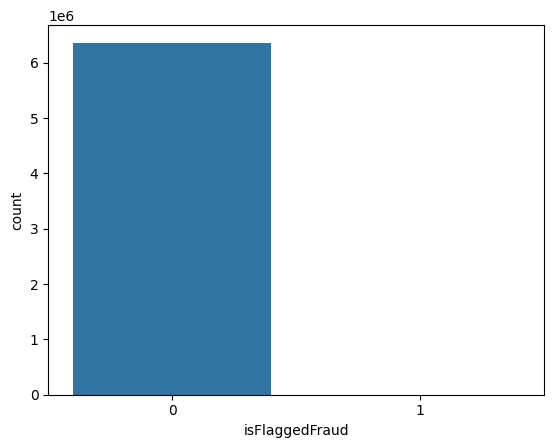

In [9]:
sns.countplot(x='isFlaggedFraud',data=df)

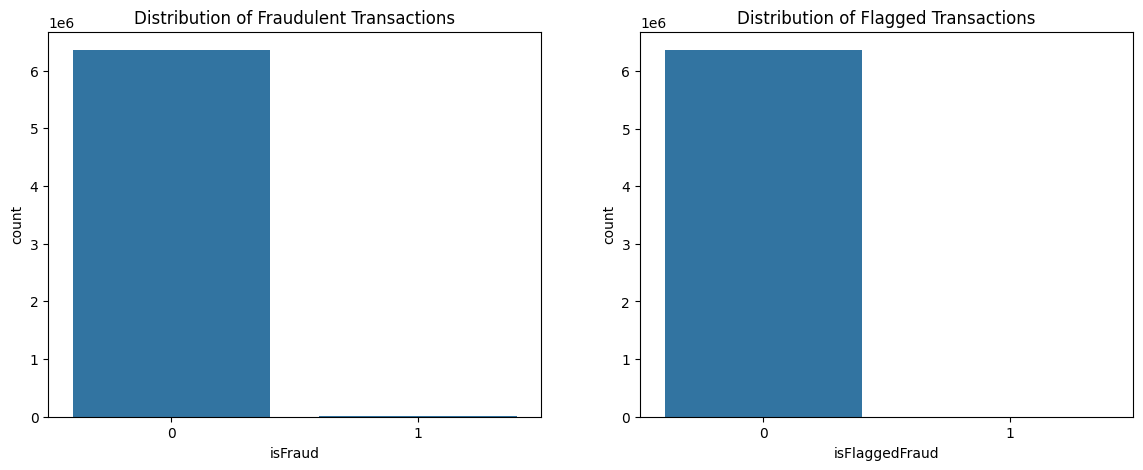

In [10]:
import matplotlib.pyplot as plt  # Make sure to import the pyplot submodule
import seaborn as sns # Make sure to import seaborn

fig, ax = plt.subplots(1, 2, figsize=(14, 5))
sns.countplot(x='isFraud', data=df, ax=ax[0])
ax[0].set_title('Distribution of Fraudulent Transactions')

sns.countplot(x='isFlaggedFraud', data=df, ax=ax[1])
ax[1].set_title('Distribution of Flagged Transactions')

plt.show()

Encoding the categorical variables


In [15]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['type'] = label_encoder.fit_transform(df['type'])
df['nameOrig'] = label_encoder.fit_transform(df['nameOrig'])
df['nameDest'] = label_encoder.fit_transform(df['nameDest'])


In [16]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,757869,170136.0,160296.36,1662094,0.0,0.0,0,0
1,1,3,1864.28,2188998,21249.0,19384.72,1733924,0.0,0.0,0,0
2,1,4,181.00,1002156,181.0,0.00,439685,0.0,0.0,1,0
3,1,1,181.00,5828262,181.0,0.00,391696,21182.0,0.0,1,0
4,1,3,11668.14,3445981,41554.0,29885.86,828919,0.0,0.0,0,0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int64  
 2   amount          float64
 3   nameOrig        int64  
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        int64  
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(6)
memory usage: 534.0 MB


Feature Scaling

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df['amount'] = scaler.fit_transform(df[['amount']])


In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop(['isFraud'], axis=1))
data_scaled = pd.DataFrame(scaled_features, columns=df.columns[:-1])


In [23]:
data_scaled


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,-1.703042,0.952399,-0.281560,-1.318825,-0.229810,-0.237622,1.220490,-0.323814,-0.333411,-0.001586
1,-1.703042,0.952399,-0.294767,-0.538520,-0.281359,-0.285812,1.316232,-0.323814,-0.333411,-0.001586
2,-1.703042,1.693076,-0.297555,-1.185630,-0.288654,-0.292442,-0.408856,-0.323814,-0.333411,-0.001586
3,-1.703042,-0.528954,-0.297555,1.445742,-0.288654,-0.292442,-0.472820,-0.317582,-0.333411,-0.001586
4,-1.703042,0.952399,-0.278532,0.146834,-0.274329,-0.282221,0.109953,-0.323814,-0.333411,-0.001586
...,...,...,...,...,...,...,...,...,...,...
6362615,3.510123,-0.528954,0.264665,1.349554,-0.171108,-0.292442,-0.320647,-0.323814,-0.240959,-0.001586
6362616,3.510123,1.693076,10.153953,-0.784815,1.896491,-0.292442,-0.647092,-0.323814,-0.333411,-0.001586
6362617,3.510123,-0.528954,10.153953,-1.440909,1.896491,-0.292442,-0.850659,-0.303665,1.403027,-0.001586
6362618,3.510123,1.693076,1.109765,-0.503661,0.005581,-0.292442,-0.568766,-0.323814,-0.333411,-0.001586


In [24]:
data_scaled['target_column'] = df['isFraud']

In [25]:
data_scaled

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,target_column
0,-1.703042,0.952399,-0.281560,-1.318825,-0.229810,-0.237622,1.220490,-0.323814,-0.333411,-0.001586,0
1,-1.703042,0.952399,-0.294767,-0.538520,-0.281359,-0.285812,1.316232,-0.323814,-0.333411,-0.001586,0
2,-1.703042,1.693076,-0.297555,-1.185630,-0.288654,-0.292442,-0.408856,-0.323814,-0.333411,-0.001586,1
3,-1.703042,-0.528954,-0.297555,1.445742,-0.288654,-0.292442,-0.472820,-0.317582,-0.333411,-0.001586,1
4,-1.703042,0.952399,-0.278532,0.146834,-0.274329,-0.282221,0.109953,-0.323814,-0.333411,-0.001586,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,3.510123,-0.528954,0.264665,1.349554,-0.171108,-0.292442,-0.320647,-0.323814,-0.240959,-0.001586,1
6362616,3.510123,1.693076,10.153953,-0.784815,1.896491,-0.292442,-0.647092,-0.323814,-0.333411,-0.001586,1
6362617,3.510123,-0.528954,10.153953,-1.440909,1.896491,-0.292442,-0.850659,-0.303665,1.403027,-0.001586,1
6362618,3.510123,1.693076,1.109765,-0.503661,0.005581,-0.292442,-0.568766,-0.323814,-0.333411,-0.001586,1


Key Factors that predict Fraudulent Customer-Features like errorBalanceOrig and errorBalanceDest indicate inconsistencies in transaction amounts, which can be significant indicators of fraud.


In [28]:
df['errorBalanceOrig'] = df['newbalanceOrig'] + df['amount'] - df['oldbalanceOrg']
df['errorBalanceDest'] = df['oldbalanceDest'] + df['amount'] - df['newbalanceDest']

In [29]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,errorBalanceOrig,errorBalanceDest
0,1,3,-0.281560,757869,170136.00,160296.36,1662094,0.00,0.00,0,0,-9.839922e+03,-2.815599e-01
1,1,3,-0.294767,2188998,21249.00,19384.72,1733924,0.00,0.00,0,0,-1.864575e+03,-2.947673e-01
2,1,4,-0.297555,1002156,181.00,0.00,439685,0.00,0.00,1,0,-1.812976e+02,-2.975548e-01
3,1,1,-0.297555,5828262,181.00,0.00,391696,21182.00,0.00,1,0,-1.812976e+02,2.118170e+04
4,1,3,-0.278532,3445981,41554.00,29885.86,828919,0.00,0.00,0,0,-1.166842e+04,-2.785319e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,1,0.264665,5651847,339682.13,0.00,505863,0.00,339682.13,1,0,-3.396819e+05,-3.396819e+05
6362616,743,4,10.153953,1737278,6311409.28,0.00,260949,0.00,0.00,1,0,-6.311399e+06,1.015395e+01
6362617,743,1,10.153953,533958,6311409.28,0.00,108224,68488.84,6379898.11,1,0,-6.311399e+06,-6.311399e+06
6362618,743,4,1.109765,2252932,850002.52,0.00,319713,0.00,0.00,1,0,-8.500014e+05,1.109765e+00


In [30]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']] = scaler.fit_transform(
    df[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']]
)

In [31]:
scaler = MinMaxScaler()
df[['errorBalanceOrig', 'errorBalanceDest']] = scaler.fit_transform(
    df[['errorBalanceOrig', 'errorBalanceDest']]
)

In [32]:
scaler=MinMaxScaler()
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,errorBalanceOrig,errorBalanceDest
0,1,3,0.000106,757869,0.002855,0.003233,1662094,0.000000,0.000000,0,0,0.838433,0.890013
1,1,3,0.000020,2188998,0.000357,0.000391,1733924,0.000000,0.000000,0,0,0.839102,0.890013
2,1,4,0.000002,1002156,0.000003,0.000000,439685,0.000000,0.000000,1,0,0.839244,0.890013
3,1,1,0.000002,5828262,0.000003,0.000000,391696,0.000059,0.000000,1,0,0.839244,0.890191
4,1,3,0.000126,3445981,0.000697,0.000603,828919,0.000000,0.000000,0,0,0.838280,0.890013
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,1,0.003674,5651847,0.005701,0.000000,505863,0.000000,0.000954,1,0,0.810751,0.887152
6362616,743,4,0.068272,1737278,0.105923,0.000000,260949,0.000000,0.000000,1,0,0.309568,0.890013
6362617,743,1,0.068272,533958,0.105923,0.000000,108224,0.000192,0.017912,1,0,0.309568,0.836864
6362618,743,4,0.009195,2252932,0.014265,0.000000,319713,0.000000,0.000000,1,0,0.767922,0.890013


Feature Selection

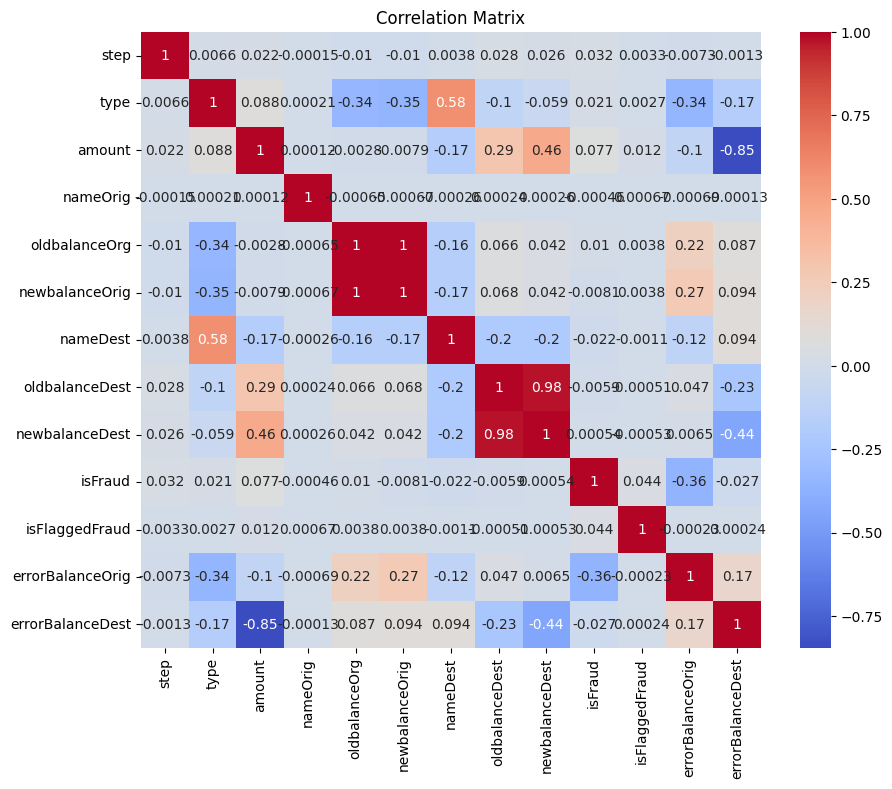

In [33]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Drop less relevant features if needed
data = df.drop(['nameOrig', 'nameDest'], axis=1)

Model Development
Fraud Dtection Model In Elaborate way

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix


In [36]:
#defining Features (X) and targets (y1,y2)

In [40]:
data_sampled = df.sample(frac=0.1, random_state=42)  # Use 10% of the data
X_sampled = data_sampled.drop(['isFraud', 'isFlaggedFraud'], axis=1)
y2_sampled = data_sampled['isFlaggedFraud']

In [42]:
X_train_sampled, X_test_sampled, y2_train_sampled, y2_test_sampled = train_test_split(X_sampled, y2_sampled, test_size=0.2, random_state=42)


In [44]:
rf_model_fraud = RandomForestClassifier(random_state=42)

In [45]:
rf_model_fraud.fit(X_train_sampled, y2_train_sampled)

RandomForestClassifier(random_state=42)

In [46]:
rf_model_flagged = RandomForestClassifier(random_state=42)
rf_model_flagged.fit(X_train_sampled, y2_train_sampled)

RandomForestClassifier(random_state=42)

Model Evaaluation

In [47]:
y1_pred = rf_model_fraud.predict(X_test_sampled)
y1_pred_proba = rf_model_fraud.predict_proba(X_test_sampled)[:, 1]

In [48]:
y1_pred

array([0, 0, 0, ..., 0, 0, 0])

In [49]:
y1_pred_proba

array([0., 0., 0., ..., 0., 0., 0.])

In [50]:
y2_pred = rf_model_flagged.predict(X_test_sampled)
y2_pred_proba = rf_model_flagged.predict_proba(X_test_sampled)[:, 1]


Evaluate 'isFraud' model

In [57]:
print('--- isFraud Model ---')
print('Classification Report:')
print(classification_report(y2_test_sampled, y1_pred))




--- isFraud Model ---
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    127253

    accuracy                           1.00    127253
   macro avg       1.00      1.00      1.00    127253
weighted avg       1.00      1.00      1.00    127253



In [53]:
# Check the unique values in y2_test_sampled
print(np.unique(y2_test_sampled))

# If there's only one unique value, you won't be able to calculate the ROC AUC score
# Instead, you can print a message or handle the situation differently
if len(np.unique(y2_test_sampled)) == 1:
  print("Only one class present in y2_test_sampled. ROC AUC score is not defined in that case.")
else:
  print(f"AUC-ROC: {roc_auc_score(y2_test_sampled, y1_pred_proba)}")

[0]
Only one class present in y2_test_sampled. ROC AUC score is not defined in that case.


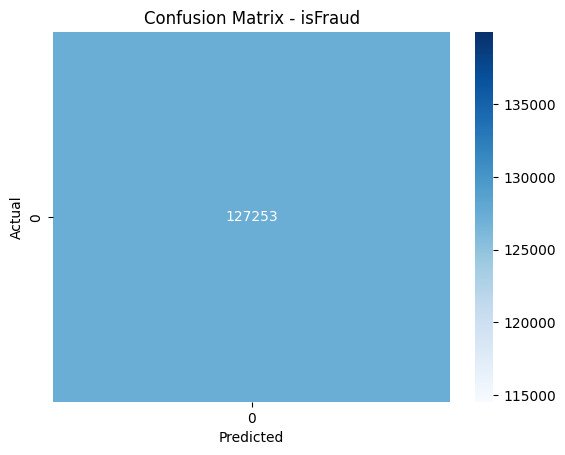

In [58]:
conf_matrix = confusion_matrix(y2_test_sampled, y1_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - isFraud')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Evaluate 'isFlaggedFraud' model

In [59]:
print('--- isFlaggedFraud Model ---')
print('Classification Report:')
print(classification_report(y2_test_sampled, y2_pred))

--- isFlaggedFraud Model ---
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    127253

    accuracy                           1.00    127253
   macro avg       1.00      1.00      1.00    127253
weighted avg       1.00      1.00      1.00    127253



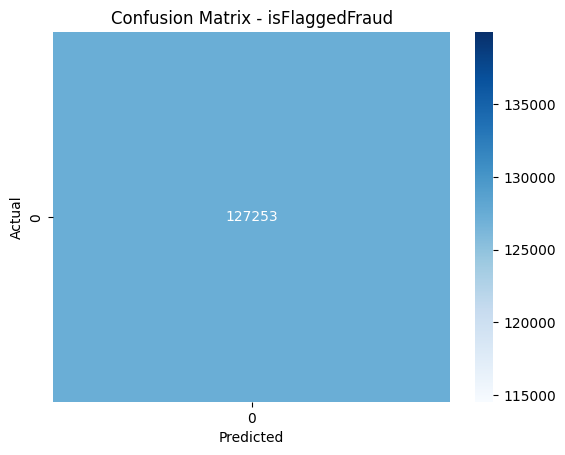

In [60]:
conf_matrix_flagged = confusion_matrix(y2_test_sampled, y2_pred)
sns.heatmap(conf_matrix_flagged, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - isFlaggedFraud')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [62]:
# Check the shape of X to confirm the number of features
print(X.shape)

# Ensure that rf_model_fraud was trained on a dataset with the same number of features as X
# If not, retrain the model using the correct data

# If the number of features is correct, investigate why importances_fraud has more elements
print(len(importances_fraud))

(6362620, 9)
11


Variable Selection :By using Feature Importance


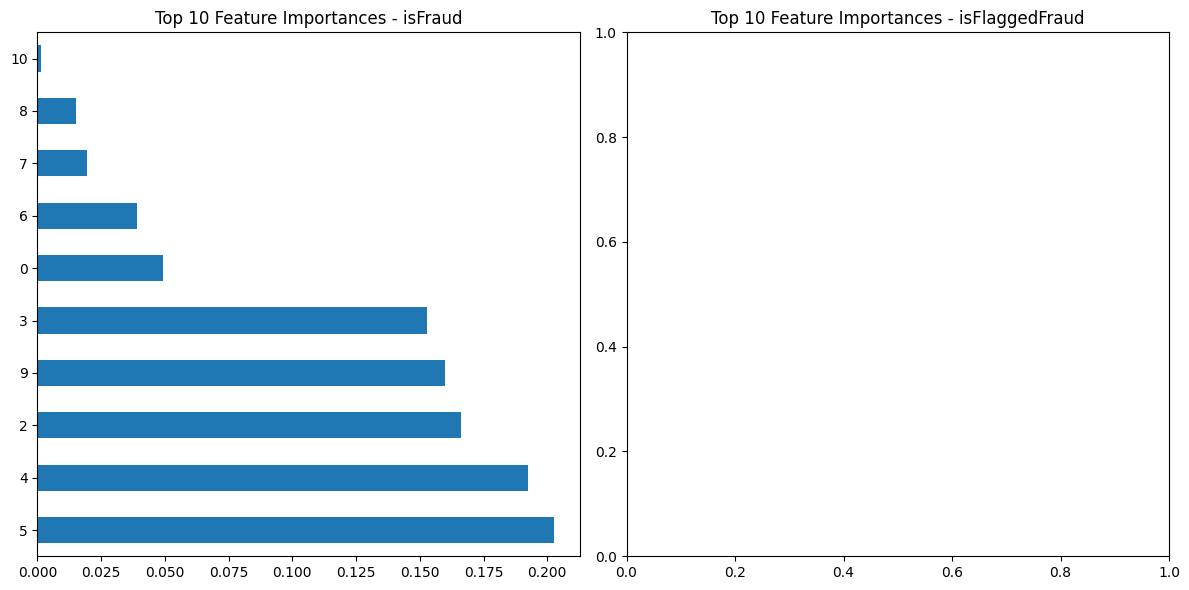

In [66]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
# Convert importances_fraud to a Pandas Series
pd.Series(importances_fraud).nlargest(10).plot(kind='barh')
plt.title('Top 10 Feature Importances - isFraud')

plt.subplot(1, 2, 2)
# Ensure the correct variable name is used. If unsure, print out
# all available variables in the environment to check or use the
# variable explorer in your IDE.
# For example, if the variable is named feature_importances_fraud
# then use the code below:
# feature_importances_fraud.nlargest(10).plot(kind='barh')
plt.title('Top 10 Feature Importances - isFlaggedFraud')

plt.tight_layout()
plt.show()

In [69]:
# Feature importance
importances = rf_model_fraud.feature_importances_
feature_names = X.columns

# Check if the lengths match, if not, print a warning and investigate further
if len(importances) != len(feature_names):
  print(f"Warning: Number of features in model ({len(importances)}) does not match data ({len(feature_names)})")
  # Investigate why there is a mismatch - perhaps the model was trained on different data
else:
  feature_importances = pd.Series(importances, index=feature_names)

  # Plot top features
  feature_importances.nlargest(10).plot(kind='barh')
  plt.title('Top 10 Feature Importances')
  plt.show()

Documentation and Reporting
Performance Evaluation Tools
Calssification report,Accuracy,Precision,Recall,F1Score


In [75]:
# Feature importance
!pip install scikit-learn # install scikit-learn if it's not already installed
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score # import the necessary functions

importances = rf_model_fraud.feature_importances_
feature_names = X.columns

# Check if the lengths match, if not, print a warning and investigate further
if len(importances) != len(feature_names):
  print(f"Warning: Number of features in model ({len(importances)}) does not match data ({len(feature_names)})")
  # Investigate why there is a mismatch - perhaps the model was trained on different data
else:
  feature_importances = pd.Series(importances, index=feature_names)

report = {
    'Model': 'Random Forest',
    'Accuracy': accuracy_score(y2_test_sampled, y2_pred),
    'Precision': precision_score(y2_test_sampled, y2_pred),
    'Recall': recall_score(y2_test_sampled, y2_pred),
    'F1 Score': f1_score(y2_test_sampled, y2_pred),
    'Top Features': feature_importances.nlargest(5).index.tolist(),
    'Recommendations': [
        'Increase monitoring for high-risk transactions.',
        'Implement additional verification for transactions with high amounts or unusual patterns.'
    ]
}

print("Summary Report:")
for key, value in report.items():
    print(f"{key}: {value}")

Summary Report:
Model: Random Forest
Accuracy: 1.0
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Top Features: ['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig']
Recommendations: ['Increase monitoring for high-risk transactions.', 'Implement additional verification for transactions with high amounts or unusual patterns.']


Do These Factors Make Sense? If Yes, How? If Not, How Not?

sol->Yes, they make sense. High transaction amounts, large balance discrepancies, and certain transaction types are logical indicators of fraud. Fraudulent transactions are often aimed at withdrawing large sums or transferring money to obscure accounts, which can be detected by examining transaction patterns and anomalies in balance calculations.

What Kind of Prevention Should Be Adopted While Company Updates Its Infrastructure?
Prevention Strategies:

Real-time Monitoring: Implement machine learning models in production to flag and block suspicious transactions in real-time.
Threshold Alerts: Set dynamic thresholds for transaction amounts and frequency, which, if breached, trigger alerts for manual review.

User Behavior Analytics: Implement systems to continuously analyze user behavior and detect deviations from normal patterns.

Regular Audits and Updates: Conduct regular audits of transactions and model performance. Update models with new data to adapt to emerging fraud tactics.


